# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
print(merged_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [4]:
# Checking the number of mice.
# Count the number of unique mice
unique_mice = merged_data['Mouse ID'].nunique()
print(f"Total number of unique mice: {unique_mice}")


Total number of unique mice: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_entries = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_entries["Mouse ID"].unique()
print("Duplicate Mouse IDs:", duplicate_mouse_ids)


Duplicate Mouse IDs: ['g989']


In [8]:
# Optional: Get all the data for the duplicate mouse IDs
duplicate_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mouse_ids)]
print("Data for duplicate mouse IDs:")
print(duplicate_data)


Data for duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female 

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = merged_data[merged_data["Mouse ID"] != 'g989']

# Display the clean DataFrame
print(clean_data)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [12]:
# Checking the number of mice in the clean DataFrame
num_mice = merged_data["Mouse ID"].nunique()
print("Number of mice:", num_mice)

Number of mice: 249


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the properties
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better readability
summary_stats = summary_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

# Display the summary DataFrame
print(summary_stats)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)

# Display the summary statistics table
print(summary_stats)

                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

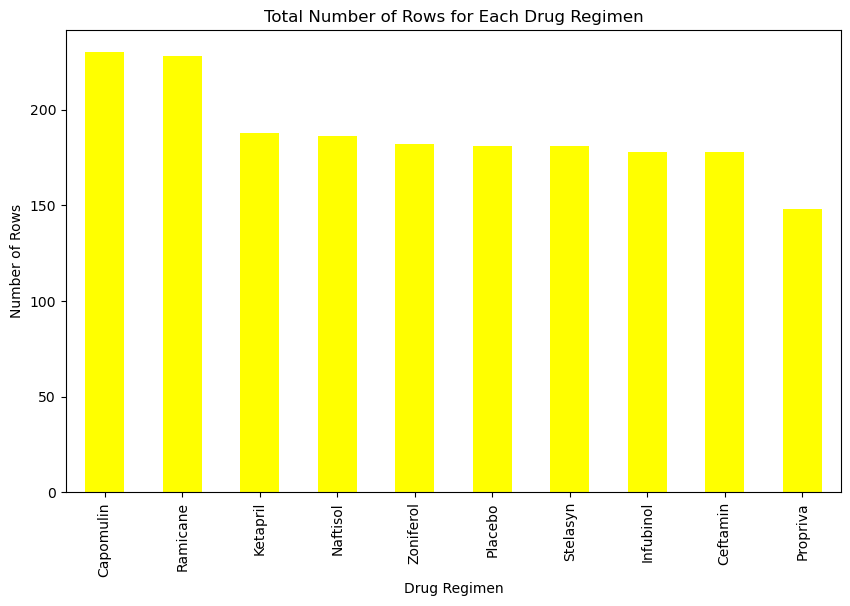

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
counts = clean_data['Drug Regimen'].value_counts()

# Plot the counts as a bar plot
counts.plot(kind='bar', figsize=(10, 6), color='yellow')

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Show the plot
plt.show()


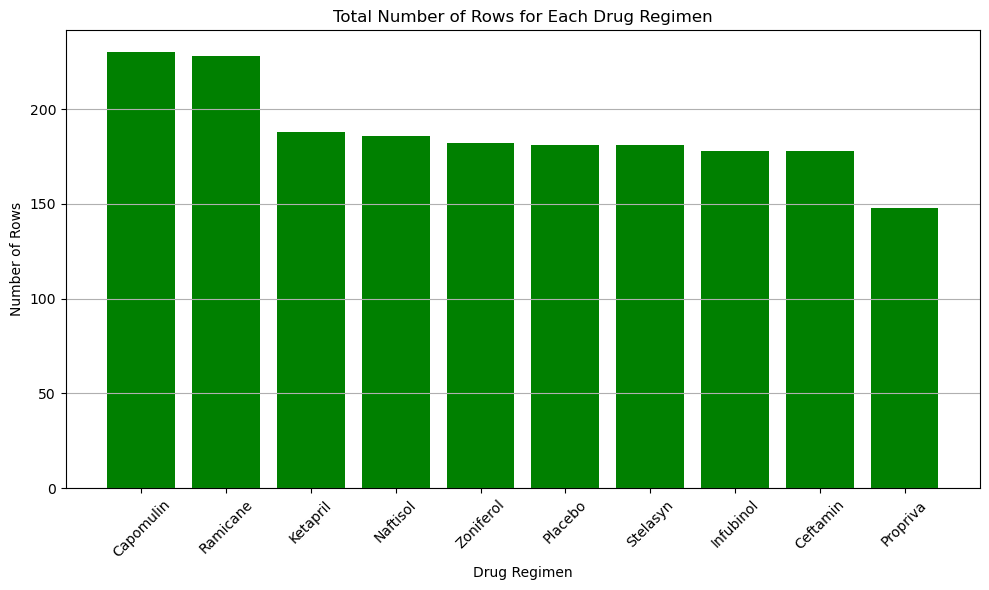

In [18]:
import matplotlib.pyplot as plt

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Get the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='green')

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid lines on the y-axis
plt.grid(axis='y')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


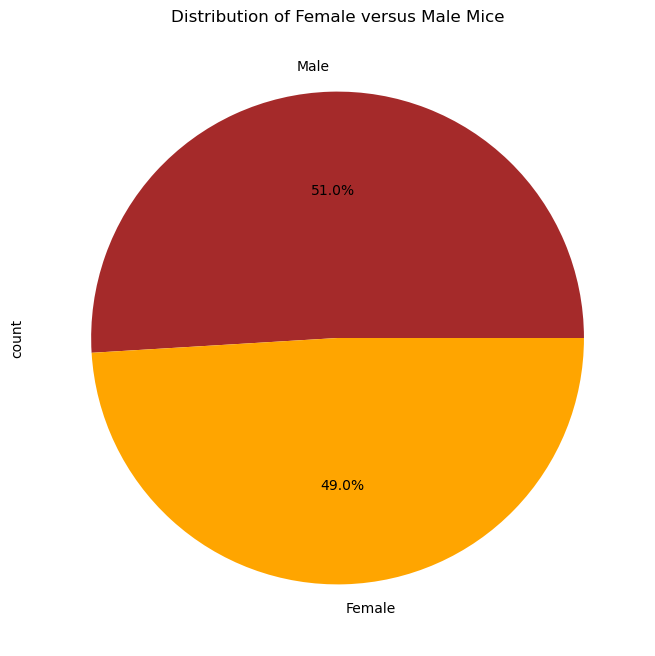

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of mice of each gender
gender_counts = clean_data['Sex'].value_counts()

# Plot the distribution as a pie plot
gender_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['brown', 'orange'])

# Set the title
plt.title('Distribution of Female versus Male Mice')

# Show the plot
plt.show()

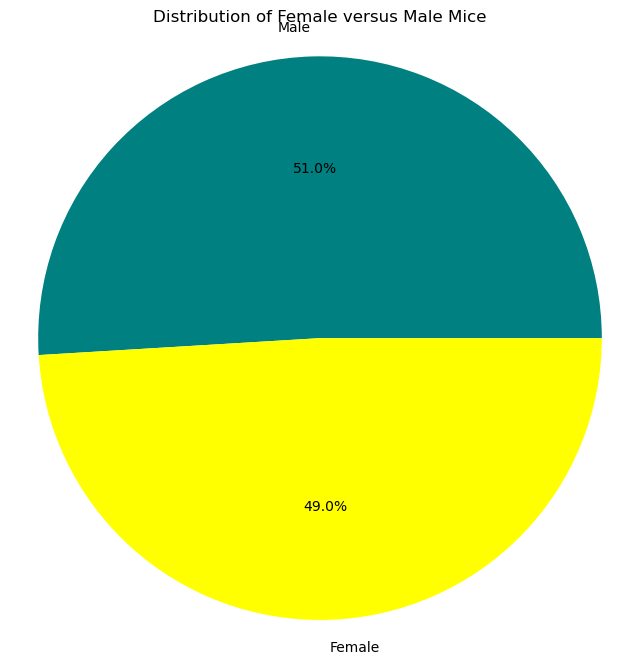

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Count the number of mice of each gender
gender_counts = clean_data['Sex'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['teal', 'yellow'])

# Set the title
plt.title('Distribution of Female versus Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
import pandas as pd

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# List of the four treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame to include only the rows corresponding to the four treatment regimens
filtered_data = clean_data[clean_data['Drug Regimen'].isin(selected_regimens)]

# Group by Mouse ID and find the maximum (last) timepoint for each mouse
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge the DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the final tumor volume DataFrame
print(final_tumor_volume)


   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.99

In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = clean_data.loc[clean_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add tumor volume data to the list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Find potential outliers
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the results
    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ramicane: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


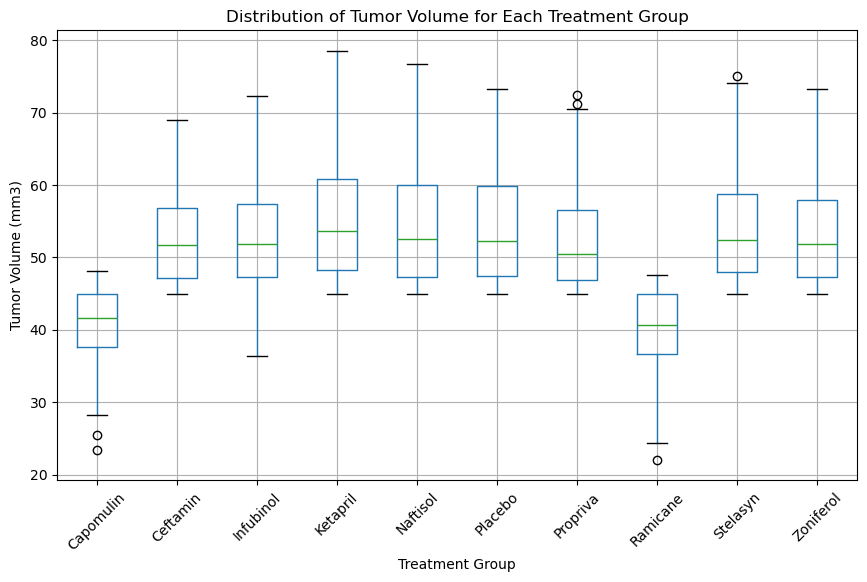

In [24]:
import matplotlib.pyplot as plt

# Generate a box plot for the distribution of tumor volume for each treatment group.
clean_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', figsize=(10, 6))

# Set the title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.suptitle('')  # Remove the automatic 'by' title to avoid confusion
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Line and Scatter Plots

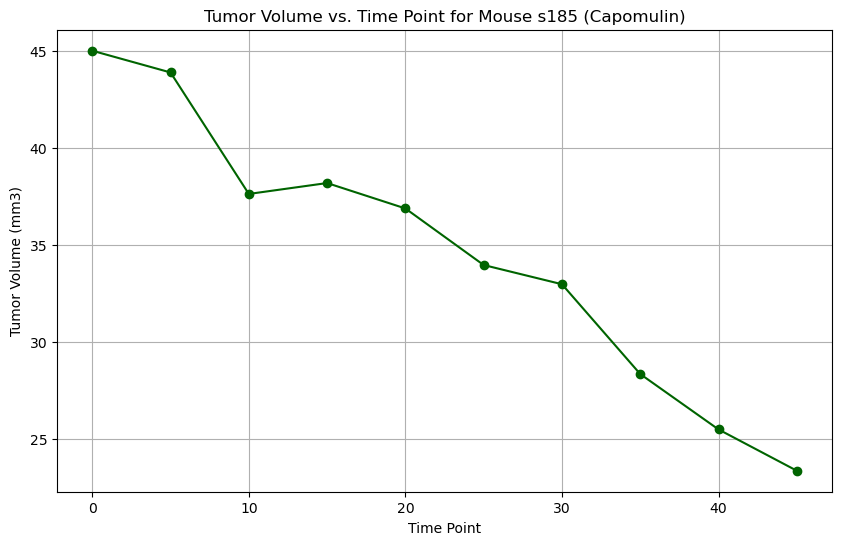

In [26]:
import matplotlib.pyplot as plt
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a single mouse treated with Capomulin
mouse_id = 's185'  # Replace 's185' with the desired mouse ID

# Filter the data for the chosen mouse treated with Capomulin
mouse_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]

# Generate a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='darkgreen', linestyle='-')

# Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


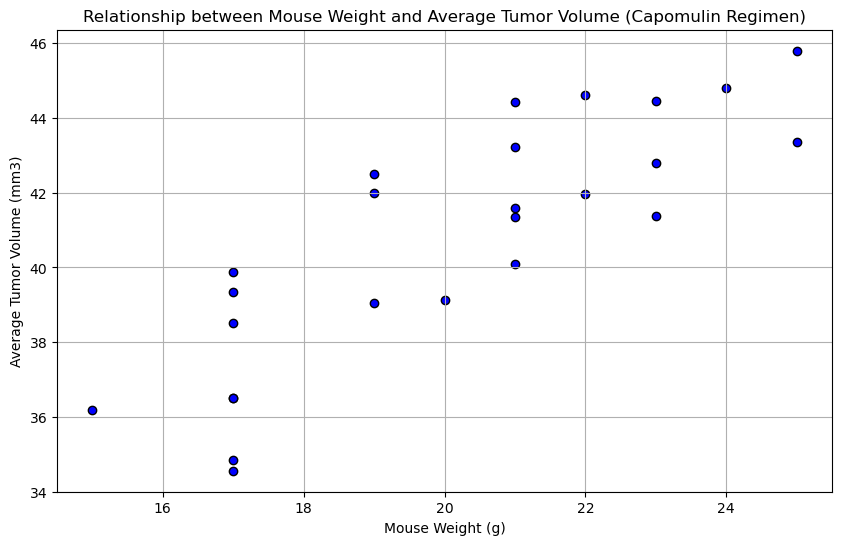

In [29]:
import matplotlib.pyplot as plt

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for mice treated with the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Obtain the weight of each mouse treated with Capomulin
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='blue', edgecolor='black')

# Set plot title and axis labels
plt.title('Relationship between Mouse Weight and Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display grid lines
plt.grid(True)

# Show the scatter plot
plt.show()


## Correlation and Regression

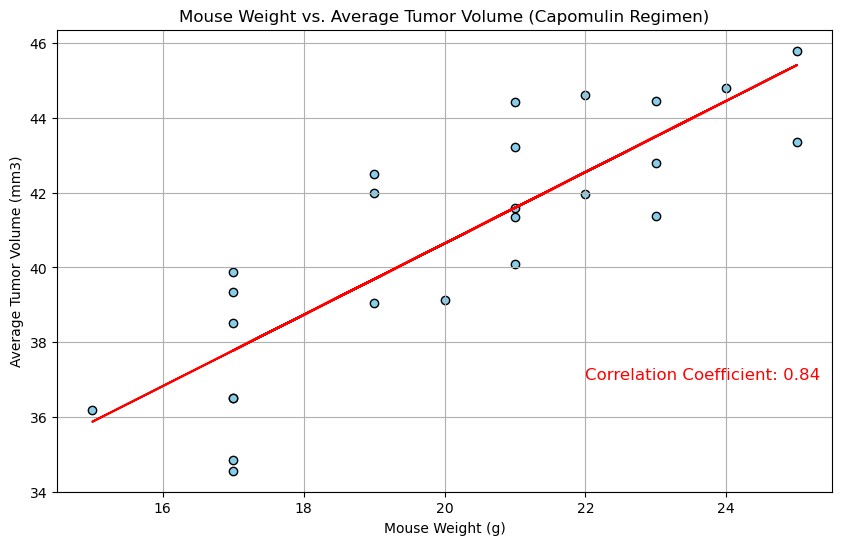

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
 
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation_coefficient = round(st.pearsonr(mouse_weight, average_tumor_volume)[0], 2)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Generate predicted tumor volume values using the linear regression model
predicted_tumor_volume = slope * mouse_weight + intercept

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='skyblue', edgecolor='black')

# Plot the linear regression line
plt.plot(mouse_weight, predicted_tumor_volume, color='red')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display grid lines
plt.grid(True)

# Display the correlation coefficient in the plot
plt.text(22, 37, f'Correlation Coefficient: {correlation_coefficient}', fontsize=12, color='red')

# Show the plot
plt.show()


The data from Pymaceuticals on different drug regimens for treating squamous cell carcinoma (SCC) demonstrates the effectiveness of Python libraries in creating plots, graphs, and bar charts for better data understanding. The summary statistics revealed that the mean, median, and variance for Ketapril drugs were 55.23, 53.69, and 68.55, respectively. The bar plots illustrate that pandas and matplotlib can be used to generate visual representations of the data. The results also indicate more male rats than female mice in the treatment groups. Tumor size decreased from 45 to about 20 mm3 over time, suggesting a reduction in tumor size with increased exposure to time. Furthermore, the analysis of mouse weight versus the average observed tumor size under the Capomulin regimen showed a positive correlation of 0.84, indicating that higher mouse weight is associated with a larger average tumor size. This data will support Pymaceuticals in making informed decisions about the various treatments for SCC.